In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes = True)

In [29]:
style.use('seaborn-ticks')
sns.set(color_codes = True)

# Plotting the composition of data

## Static composition

### Pie Chart

In [30]:
p = sns.load_dataset('penguins')
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [31]:
c = p.groupby('species')['species'].count()

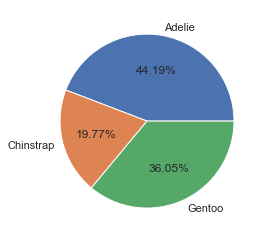

In [32]:
plt.pie(c, labels = c.index, autopct='%.2f%%');

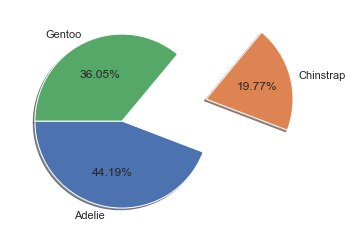

In [33]:
plt.pie(c, labels = c.index, autopct='%.2f%%', explode=[0,1,0], startangle=180, shadow=True);

### Donut Chart

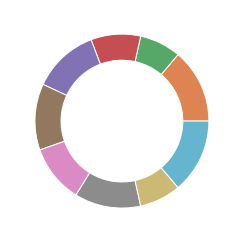

In [34]:
plt.pie(np.random.randint(0,10,10), wedgeprops=dict(width=0.3));

In [35]:
# colormap
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
cmap = plt.get_cmap('Set1')
my_colours = cmap(np.arange(10)) # To pick out 10 colors from the solormap

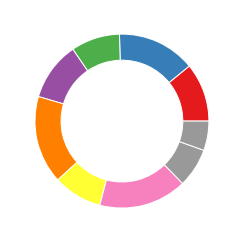

In [36]:
plt.pie(np.random.randint(0,10,10), wedgeprops=dict(width=0.3), colors=my_colours);

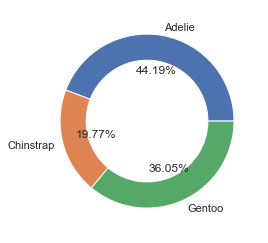

In [37]:
plt.pie(c, labels = c.index, autopct='%.2f%%', wedgeprops=dict(width=0.3));

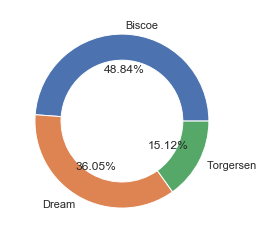

In [38]:
c_i = p.groupby('island')['island'].count()
plt.pie(c_i, labels = c_i.index, autopct='%.2f%%', wedgeprops=dict(width=0.3));

In [39]:
c = pd.crosstab(p.species,p.island)
c

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [40]:
c = c.T

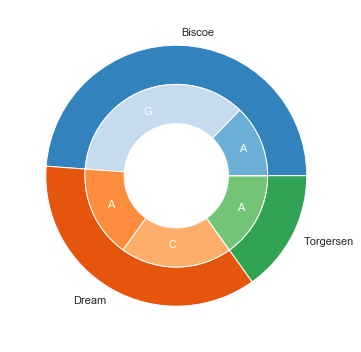

In [41]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0,4,8]))
inner_colors = cmap(np.array([1,2,3,5,6,7,9,10,11]))
fig = plt.gcf() # Handler for the figure
fig.set_size_inches(10,6)
plt.pie(c.sum(axis=1), labels = c.index,
        radius = 1, wedgeprops=dict(width=0.3),
        colors=outer_colors);
plt.pie(c.values.flatten(),radius=0.7,
        labels=['A','','G','A','C','','A','',''],
        wedgeprops=dict(width=0.3),
       colors=inner_colors,
       labeldistance=0.75,
       textprops=dict(color='w'));

## Stacked Bar plots

In [56]:
url = 'https://api.covid19india.org/states_daily.json'
import urllib.request # download file from url
urllib.request.urlretrieve(url, 'data.json')
import json
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
from pandas.io.json import json_normalize
df = pd.json_normalize(data)
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [57]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.set_index('status', inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt',inplace=True)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
df_.head()

status,Confirmed,Recovered,Deceased
an,137,95,1
ap,9996,9499,82
ar,82,59,1
as,2796,2174,8
br,3906,2439,10


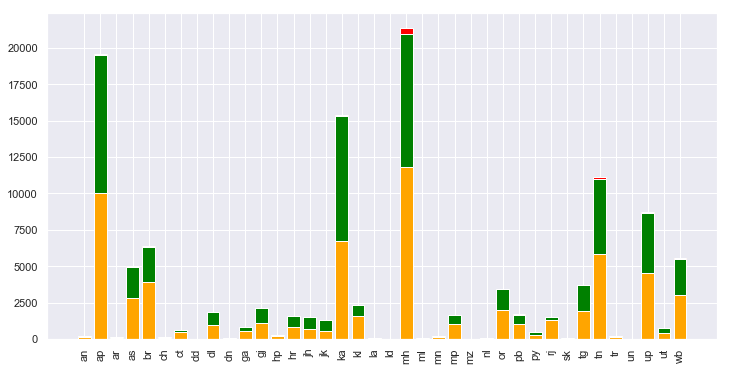

In [66]:
fig = plt.gcf();
fig.set_size_inches(12,6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color='Red')
plt.xticks(rotation=90);

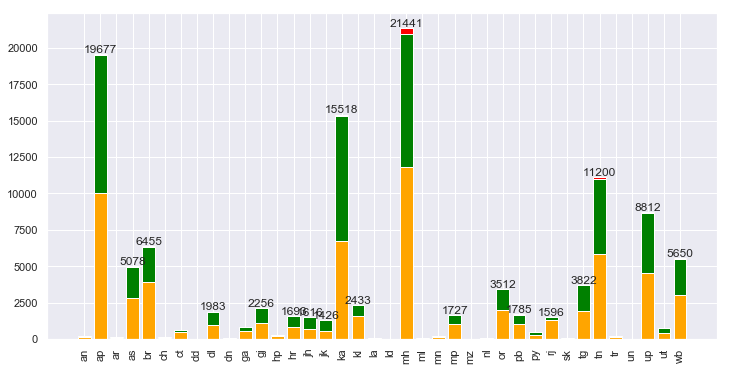

In [70]:
# Annotate plot
fig = plt.gcf();
fig.set_size_inches(12,6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color='Red')
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x,y,str(y), ha='center'); # horizontal align

## Relative stacked bar plots

In [71]:
df_['Total'] = df_.sum(axis=1)
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DecesedFraction'] = df_['Deceased'] / df_['Total']
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DecesedFraction
an,137,95,1,233,0.587983,0.407725,0.004292
ap,9996,9499,82,19577,0.510599,0.485212,0.004189
ar,82,59,1,142,0.577465,0.415493,0.007042
as,2796,2174,8,4978,0.561671,0.436722,0.001607
br,3906,2439,10,6355,0.614634,0.383792,0.001574


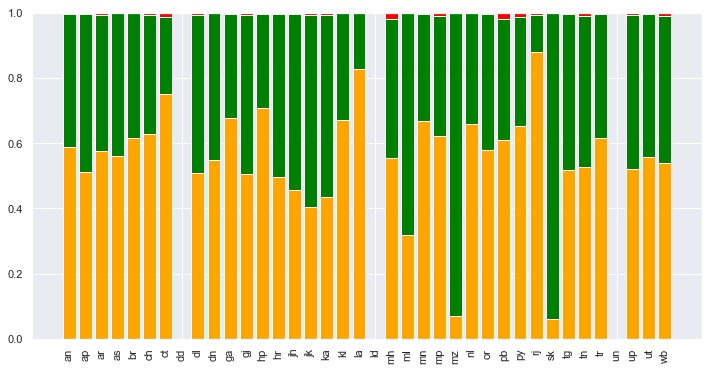

In [73]:
fig = plt.gcf(); # plot handler
fig.set_size_inches(12,6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DecesedFraction, bottom=df_.ConfirmedFraction+df_.RecoveredFraction, color='Red')
plt.xticks(rotation=90);


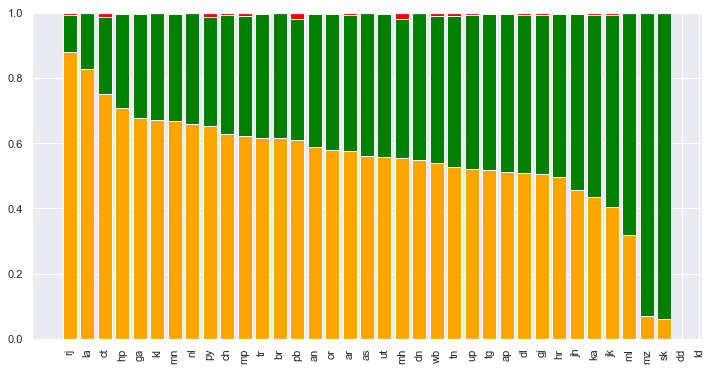

In [74]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)
fig = plt.gcf(); # plot handler
fig.set_size_inches(12,6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DecesedFraction, bottom=df_.ConfirmedFraction+df_.RecoveredFraction, color='Red')
plt.xticks(rotation=90);

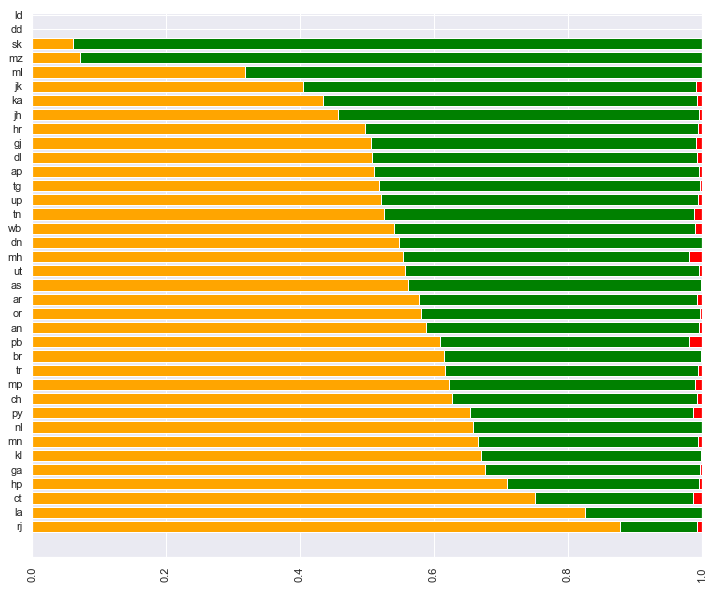

In [78]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)
fig = plt.gcf(); # plot handler
fig.set_size_inches(12,10);
plt.barh(df_.index, df_.ConfirmedFraction, color='Orange');
plt.barh(df_.index, df_.RecoveredFraction, left=df_.ConfirmedFraction, color='Green');
plt.barh(df_.index, df_.DecesedFraction, left=df_.ConfirmedFraction+df_.RecoveredFraction, color='Red')
plt.xticks(rotation=90);

# Time-Varying Composition of Data

## Stacked Area Chart

In [79]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [80]:
df_ = df[['mh','date','status']]
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])
df_.head()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


In [81]:
#    date   | confirmed | recovered | deceased
# 2020-03-14 |     14    |      0    |    0

In [82]:
df_ = df_.pivot_table(values='mh',columns='status',index='date')

In [83]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


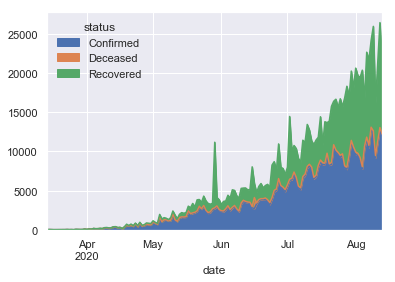

In [85]:
df_.plot.area();

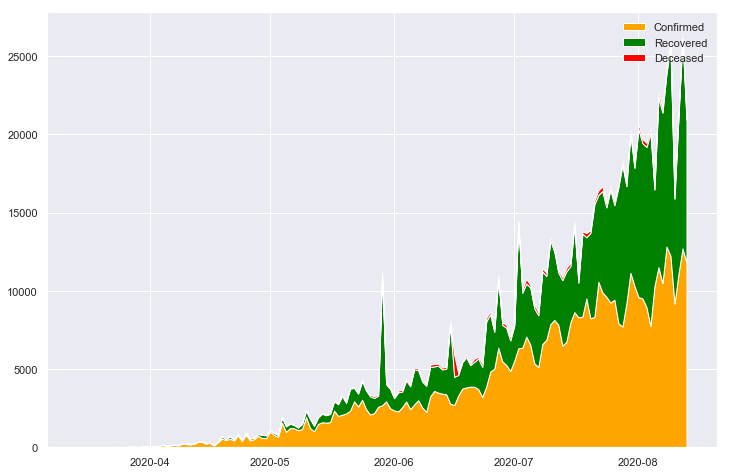

In [95]:
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels = ['Confirmed', 'Recovered', 'Deceased'],
             colors = ['orange', 'green', 'red']);
plt.legend();

## Relative Stacked area plot

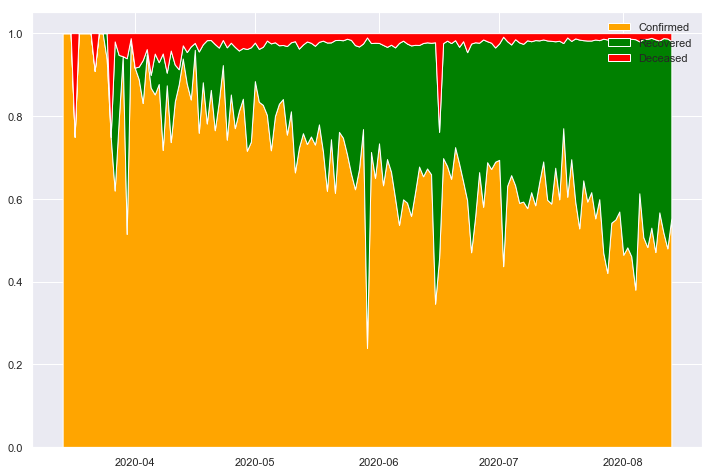

In [97]:
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), df_.Recovered/df_.sum(axis=1), df_.Deceased/df_.sum(axis=1),
              labels = ['Confirmed', 'Recovered', 'Deceased'],
             colors = ['orange', 'green', 'red']);
plt.legend();

# Plotting relationships between data

## Scatter plot (Continuous Variable)

In [98]:
t = sns.load_dataset('tips')

In [99]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


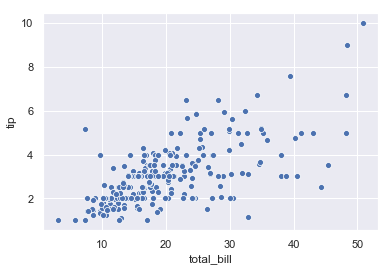

In [100]:
sns.scatterplot(x='total_bill', y='tip', data=t);

In [101]:
t['tip_fraction'] = t['tip']/t['total_bill']

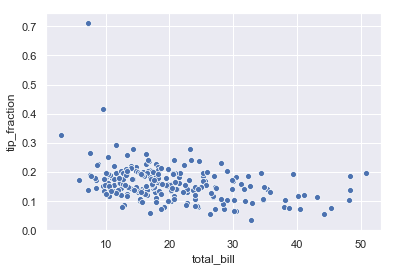

In [102]:
sns.scatterplot(x='total_bill', y='tip_fraction', data=t);

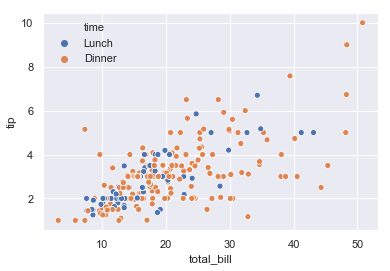

In [103]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time');

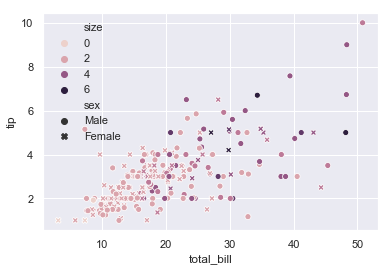

In [105]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='size', style='sex');

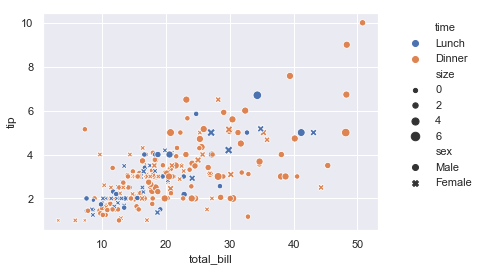

In [108]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time', style='sex', size='size');
plt.legend(bbox_to_anchor=(1.05,1));

## Regression Plot (Continuous Variable)

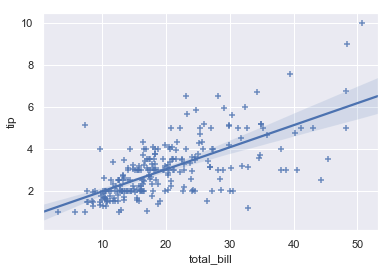

In [115]:
sns.regplot(x='total_bill', y='tip', data=t, marker='+');

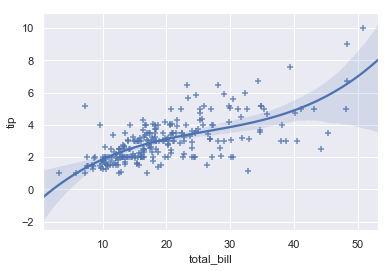

In [116]:
sns.regplot(x='total_bill', y='tip', data=t, marker='+', order=3);

## Bar plots (Categorical Variable)

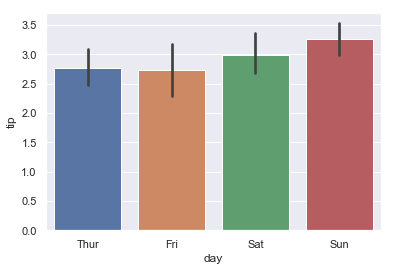

In [119]:
sns.barplot(x='day', y='tip', data=t);

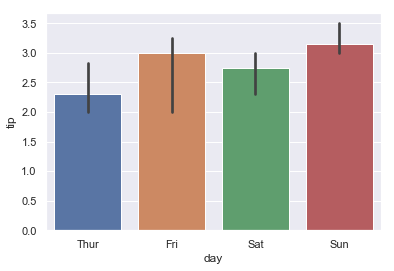

In [120]:
sns.barplot(x='day', y='tip', data=t, estimator=np.median);

In [121]:
def my_estimate(v):
    return np.quantile(v , 0.25)

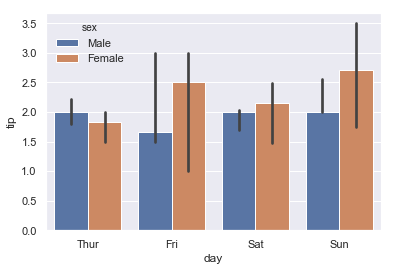

In [123]:
sns.barplot(x='day', y='tip', hue='sex', data=t, estimator=my_estimate);

## Bar Plot (continuous variable)

In [124]:
d = sns.load_dataset('diamonds')
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


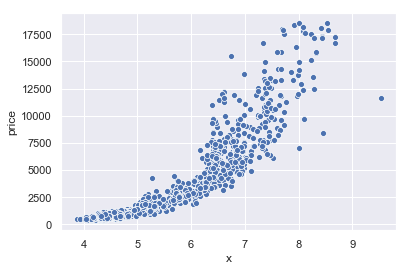

In [125]:
sns.scatterplot('x', 'price', data=d.sample(1000));

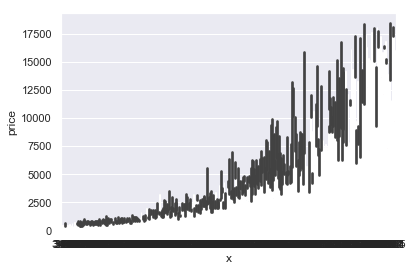

In [126]:
sns.barplot('x', 'price', data=d.sample(1000));

In [128]:
d['x_q'] = pd.cut(d['x'], bins = 7) # To covert data into bins

In [129]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.069, 4.603]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.069, 4.603]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.069, 4.603]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.069, 4.603]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(3.069, 4.603]"


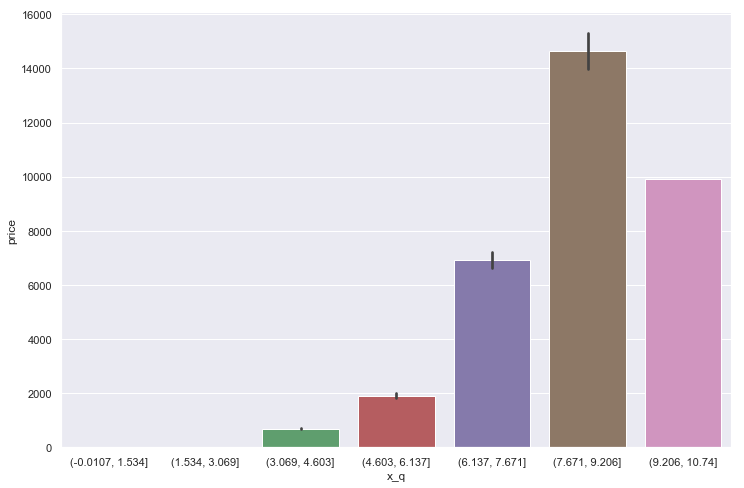

In [134]:
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.barplot('x_q', 'price', data=d.sample(1000));

In [138]:
d['x_q'] = pd.cut(d['x'], bins = 15, labels=False)
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6


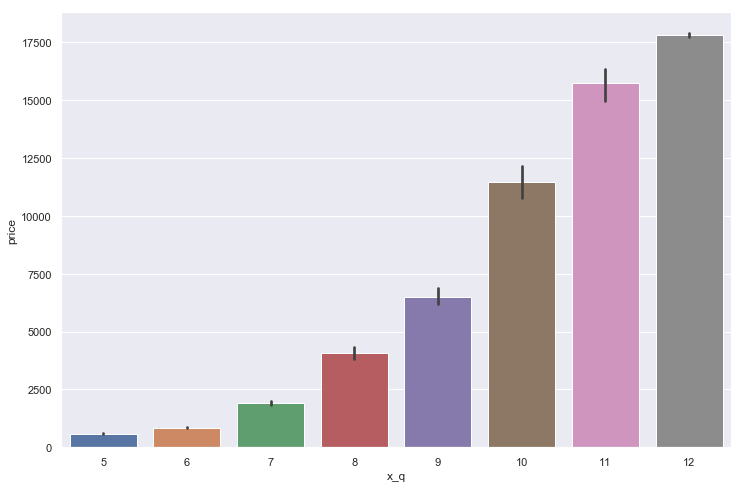

In [139]:
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.barplot('x_q', 'price', data=d.sample(1000));

# Line Plot

In [140]:
f = sns.load_dataset('fmri')
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


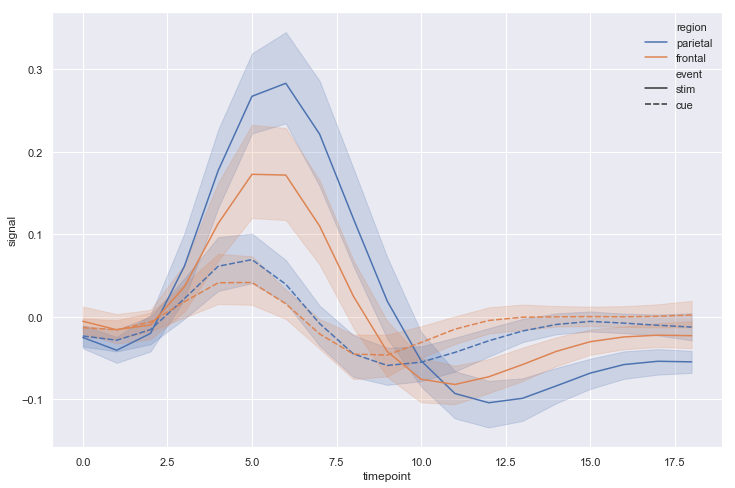

In [146]:
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.lineplot('timepoint', 'signal', data=f, hue='region', style='event');

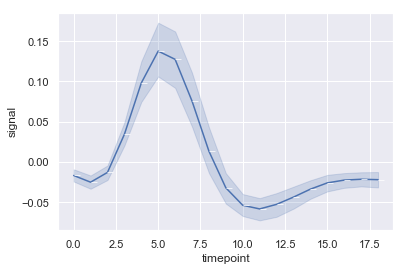

In [147]:
sns.lineplot('timepoint', 'signal', data=f, marker=True);

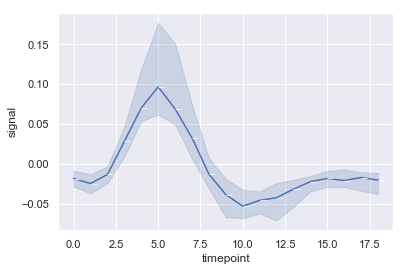

In [148]:
sns.lineplot('timepoint', 'signal', data=f, marker=True, estimator=np.median);

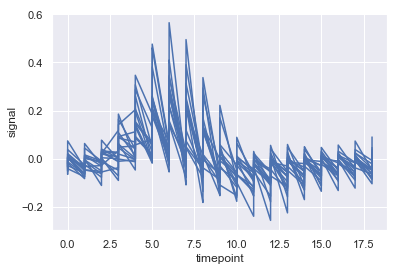

In [149]:
sns.lineplot('timepoint', 'signal', data=f, units='subject', estimator=None);

In [150]:
f_ = f[(f.region == 'parietal') & (f.event == 'cue')]
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


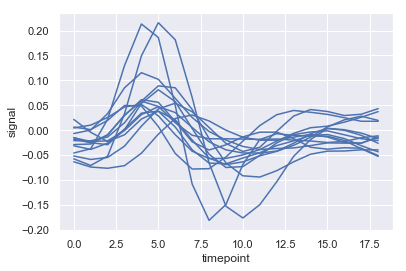

In [151]:
sns.lineplot('timepoint', 'signal', data=f_, units='subject', estimator=None);

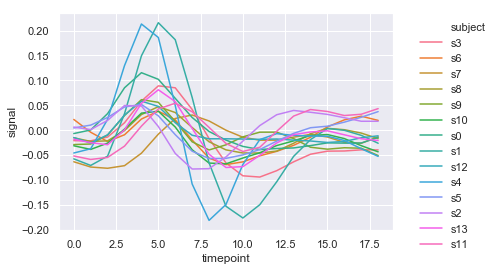

In [153]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject', estimator=None);
plt.legend(bbox_to_anchor=(1.05,1));

In [154]:
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
from pandas.io.json import json_normalize
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('tt', axis=1,inplace=True)
df.set_index('date', inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace=True)

In [155]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,...,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,0,1,0,0,0,0,0,0,7,...,0,3,0,1,1,0,0,12,0,0
1,2020-03-15,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,1,0,0
2,2020-03-16,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,2020-03-17,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,2,0,1
4,2020-03-18,0,0,0,0,0,0,0,0,2,...,0,3,0,8,1,0,0,2,1,0


In [156]:
df_ = pd.melt(df, id_vars='date',
              value_vars = list(df.columns).remove('date'),
              var_name = 'state', value_name = 'confirmed')

In [157]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


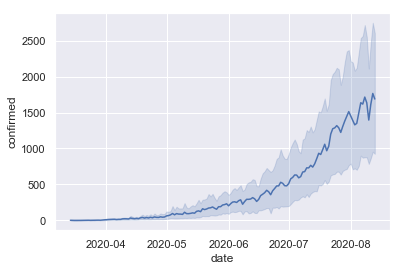

In [158]:
sns.lineplot('date', 'confirmed', data=df_);

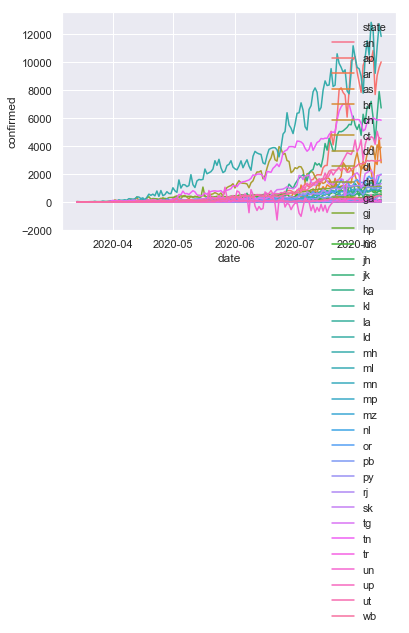

In [160]:
sns.lineplot('date', 'confirmed',hue='state', data=df_);

In [161]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']
df_ = df_[df_.state.isin(states)]

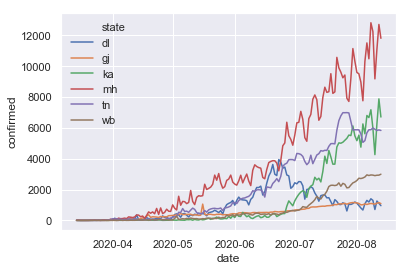

In [162]:
sns.lineplot('date', 'confirmed', data=df_, hue='state');

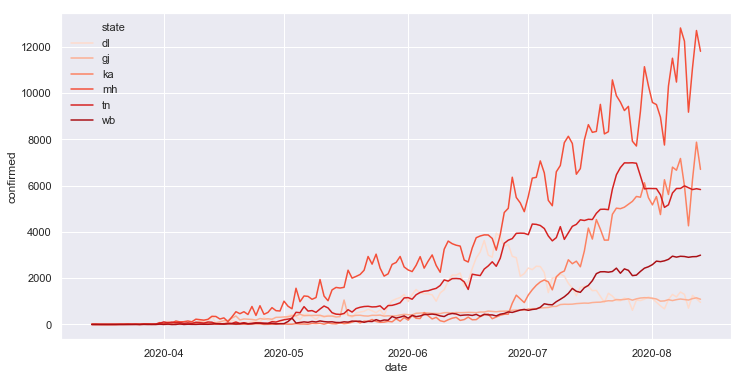

In [164]:
fig = plt.gcf()
fig.set_size_inches(12,6)
sns.lineplot('date', 'confirmed', data=df_, hue='state', palette='Reds');

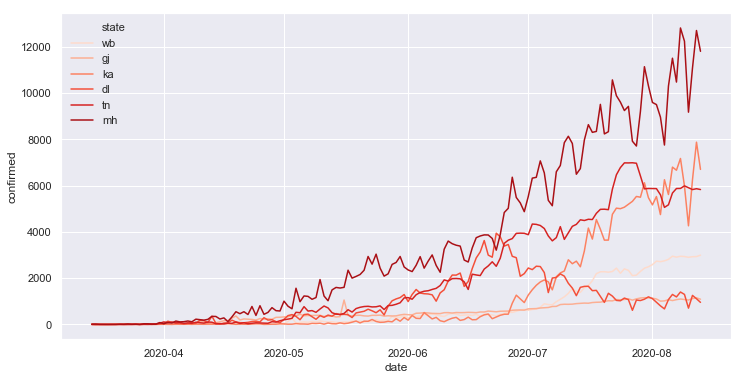

In [166]:
fig = plt.gcf()
fig.set_size_inches(12,6)
sns.lineplot('date', 'confirmed', data=df_, hue='state', palette='Reds',
             hue_order = ['wb', 'gj','ka', 'dl', 'tn', 'mh']);

In [177]:
# we have very much noise in our data so we can take rolling mean of the data to smoothen it
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
from pandas.io.json import json_normalize
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('tt', axis=1,inplace=True)
df.set_index('date', inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df = df.rolling(7).mean()
df.reset_index(inplace=True)

In [178]:
df_ = pd.melt(df, id_vars='date',
              value_vars = list(df.columns).remove('date'),
              var_name = 'state', value_name = 'confirmed')

In [179]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']
df_ = df_[df_.state.isin(states)]

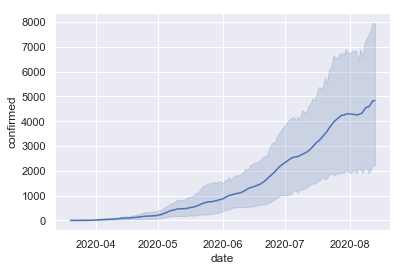

In [180]:
sns.lineplot('date', 'confirmed', data=df_);

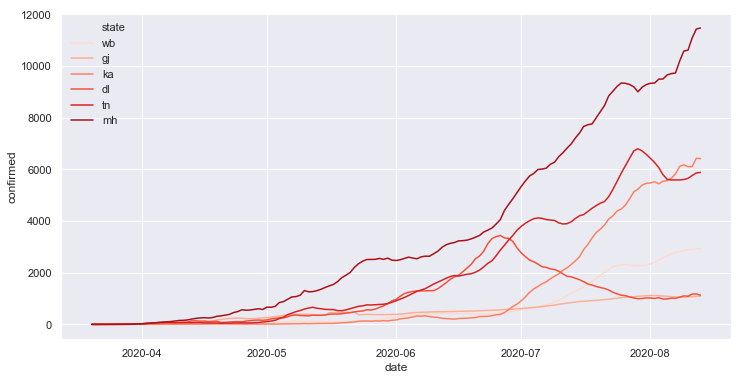

In [181]:
fig = plt.gcf()
fig.set_size_inches(12,6)
sns.lineplot('date', 'confirmed', data=df_, hue='state', palette='Reds',
             hue_order = ['wb', 'gj','ka', 'dl', 'tn', 'mh']);

# Heat Map

In [184]:
fl = sns.load_dataset('flights')
fl.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [185]:
fl_ = fl.pivot(index='year', columns='month', values='passengers')
fl_.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


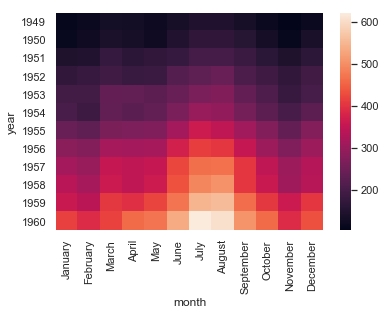

In [187]:
sns.heatmap(fl_);

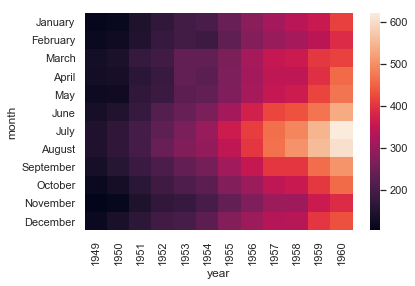

In [188]:
sns.heatmap(fl_.T);

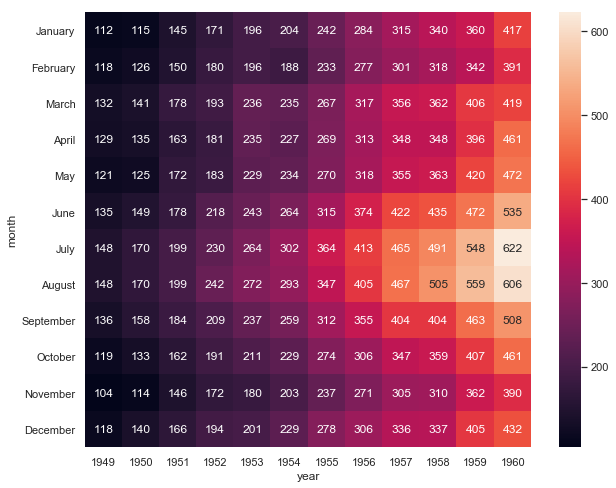

In [191]:
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot=True, fmt='d');

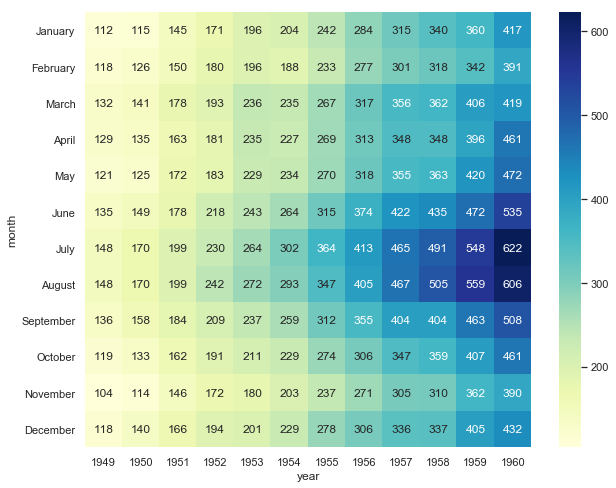

In [192]:
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap='YlGnBu');

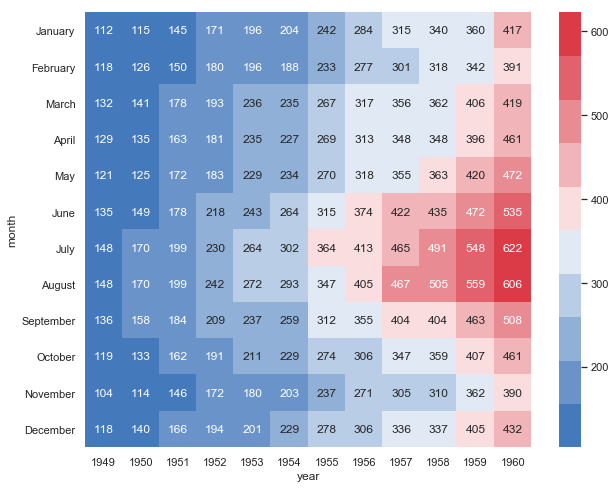

In [193]:
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(250, 10, n=10));

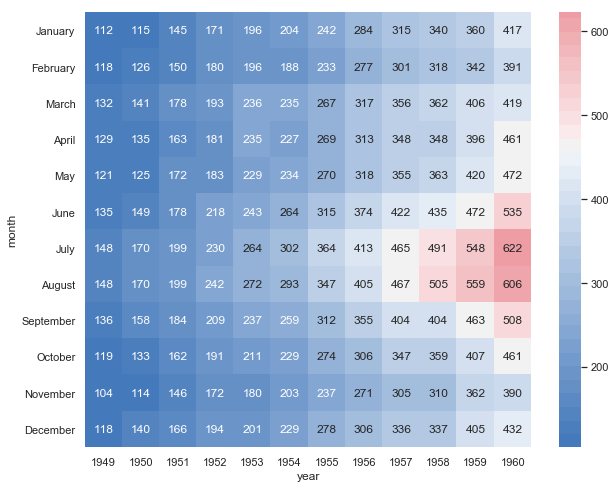

In [197]:
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot=True, fmt='d',
            cmap=sns.diverging_palette(250, 10, n=45),
            center=fl_.loc[1957, 'July']);

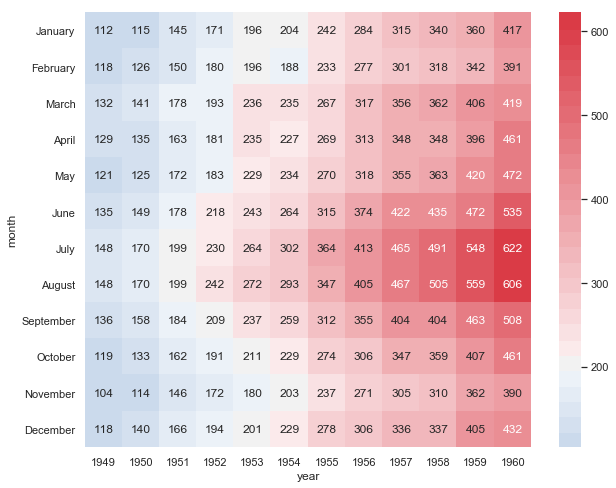

In [198]:
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot=True, fmt='d',
            cmap=sns.diverging_palette(250, 10, n=45),
            center=fl_.loc[1954, 'January']);